# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import scipy.stats as st
from sklearn import datasets



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
weather_api_key = "6955725d95f8bcddf4748b4973edf491"

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key

city_data = []
print("Beginning data retreival")

        

Beginning data retreival


In [37]:
record_count = 1
for i,city in enumerate(cities):
    city_url = base_url + "&q="+city
    print("Processing record %s | %s" % (record_count,city))
    try:
        weather = requests.get(city_url).json()
#         print(weather)
#         print(city_url)
#         break
        
        lat=weather['coord']['lat']
        lng=weather['coord']['lon']
        max_temp=weather['main']['temp_max']
        humidity=weather['main']['humidity']
        cloudiness=weather['clouds']['all']
        windspeed=weather['wind']['speed']
        country=weather['sys']['country']
        date= weather['dt']
        
        city_data.append({
            "City":city,
            "Lat":lat,
            "Lng":lng,
            "Max Temp":max_temp,
            "Humidity":humidity,
            "Cloudiness":cloudiness,
            "Wind Speed":windspeed,
            "Country":country,
            "Date":date,
        })
    
    except:
        print("City not found")
        pass
print("data retrieval complete")

    

Processing record 1 | puerto ayora
Processing record 1 | kaitangata
Processing record 1 | broome
Processing record 1 | whyalla
Processing record 1 | mount gambier
Processing record 1 | rikitea
Processing record 1 | punta arenas
Processing record 1 | dikson
Processing record 1 | talnakh
Processing record 1 | borkenes
Processing record 1 | tuktoyaktuk
Processing record 1 | sehithwa
Processing record 1 | kasama
Processing record 1 | ushuaia
Processing record 1 | butaritari
Processing record 1 | vila franca do campo
Processing record 1 | tatawin
Processing record 1 | agropoli
Processing record 1 | taolanaro
City not found
Processing record 1 | avarua
Processing record 1 | mataura
Processing record 1 | atuona
Processing record 1 | albany
Processing record 1 | tabiauea
City not found
Processing record 1 | khatanga
Processing record 1 | saint george
Processing record 1 | waddan
Processing record 1 | mattru
Processing record 1 | arlit
Processing record 1 | qaanaaq
Processing record 1 | buariki

Processing record 1 | frontignan
Processing record 1 | cidreira
Processing record 1 | soubre
Processing record 1 | rapid valley
Processing record 1 | wuwei
Processing record 1 | hami
Processing record 1 | chernyshevskiy
Processing record 1 | burica
City not found
Processing record 1 | imbituba
Processing record 1 | lasem
Processing record 1 | kalashnikovo
Processing record 1 | leningradskiy
Processing record 1 | nowa sol
Processing record 1 | puerto ayacucho
Processing record 1 | vanimo
Processing record 1 | alihe
Processing record 1 | inhambane
Processing record 1 | alice springs
Processing record 1 | saldanha
Processing record 1 | arkhipovka
Processing record 1 | ponta do sol
Processing record 1 | lukow
Processing record 1 | deputatskiy
Processing record 1 | tiksi
Processing record 1 | riverton
Processing record 1 | talcahuano
Processing record 1 | yabrud
Processing record 1 | oranjemund
Processing record 1 | capao da canoa
Processing record 1 | flinders
Processing record 1 | lesnoy


Processing record 1 | mackenzie
Processing record 1 | aygut
Processing record 1 | juifang
City not found
Processing record 1 | seoul
Processing record 1 | pagudpud
Processing record 1 | pangnirtung
Processing record 1 | derzhavinsk
Processing record 1 | floro
Processing record 1 | manubul
Processing record 1 | washington
Processing record 1 | puerto madryn
Processing record 1 | nelson bay
Processing record 1 | warri
Processing record 1 | sofiysk
City not found
Processing record 1 | marawi
Processing record 1 | kabo
Processing record 1 | farafangana
Processing record 1 | drovyanaya
Processing record 1 | kutum
Processing record 1 | noumea
Processing record 1 | dolzhanskaya
Processing record 1 | kozhva
Processing record 1 | ylojarvi
Processing record 1 | kupang
Processing record 1 | sembe
Processing record 1 | grand-lahou
Processing record 1 | doha
Processing record 1 | wad rawah
Processing record 1 | masterton
Processing record 1 | riyadh
Processing record 1 | ambilobe
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [39]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,78.80,65,40,19.46,EC,1593452591
1,kaitangata,-46.28,169.85,44.01,75,94,7.00,NZ,1593452780
2,broome,42.25,-75.83,80.01,50,20,14.99,US,1593452598
3,whyalla,-33.03,137.58,46.40,52,1,10.29,AU,1593452780
4,mount gambier,-37.83,140.77,46.40,81,53,9.17,AU,1593452780


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
city_data_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,20.461776,19.510720,68.405126,70.262982,53.072027,8.476985,1.593453e+09
std,33.373431,88.588182,14.676618,20.274033,36.005590,5.710797,8.352959e+01
min,-54.800000,-179.170000,30.200000,1.000000,0.000000,0.180000,1.593453e+09
25%,-7.000000,-57.970000,57.200000,59.000000,20.000000,4.120000,1.593453e+09
50%,25.330000,25.090000,69.940000,75.000000,56.000000,7.020000,1.593453e+09
75%,50.200000,97.520000,79.000000,85.000000,90.000000,11.410000,1.593453e+09
max,78.220000,178.420000,104.200000,100.000000,100.000000,38.030000,1.593453e+09


In [44]:
#  Get the indices of cities that have humidity over 100%.
cities_humid_greater100 = city_data_df[city_data_df['Humidity']>100].index
cities_humid_greater100

Int64Index([], dtype='int64')

In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cities_hum_less_100_df = city_data_df.drop(cities_humid_greater100,inplace=False)

cities_hum_less_100_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,78.80,65,40,19.46,EC,1593452591
1,kaitangata,-46.28,169.85,44.01,75,94,7.00,NZ,1593452780
2,broome,42.25,-75.83,80.01,50,20,14.99,US,1593452598
3,whyalla,-33.03,137.58,46.40,52,1,10.29,AU,1593452780
4,mount gambier,-37.83,140.77,46.40,81,53,9.17,AU,1593452780


In [48]:
# Extract relevant fields from the data frame
lat = cities_hum_less_100_df['Lat']
MaxTemp = cities_hum_less_100_df['Max Temp'] 
Humidity = cities_hum_less_100_df['Humidity']
Cloudiness = cities_hum_less_100_df['Cloudiness']
WindSpeed   = cities_hum_less_100_df['Wind Speed']
# Export the City_Data into a csv
cities_hum_less_100_df.to_csv(output_data_file,index_label="city_id")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

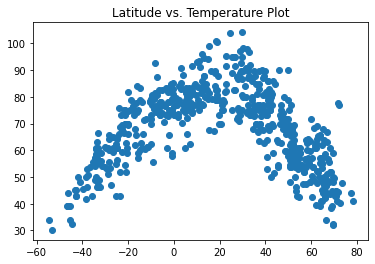

In [55]:
# cities_hum_less_100_df.plot(kind='scatter', x=lat, y=MaxTemp);
plt.scatter(lat,MaxTemp)

plt.title('Latitude vs. Temperature Plot')

plt.savefig("Images/Lat vs. Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

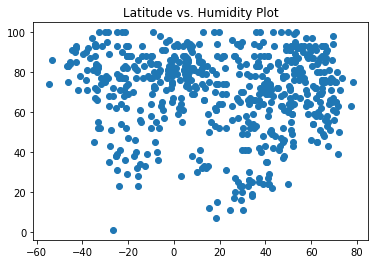

In [56]:
plt.scatter(lat,Humidity)

plt.title('Latitude vs. Humidity Plot')

plt.savefig("Images/Lat vs. Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

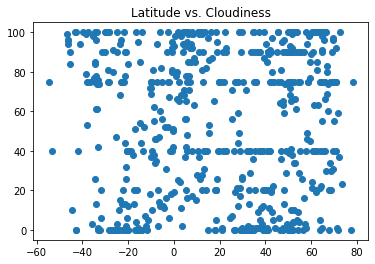

In [57]:
plt.scatter(lat,Cloudiness)


plt.title('Latitude vs. Cloudiness')

plt.savefig("Images/Lat vs. Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

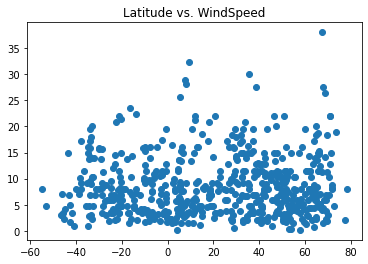

In [58]:
plt.scatter(lat,WindSpeed)


plt.title('Latitude vs. WindSpeed')

plt.savefig("Images/Lat vs. WindSpeed.png")

plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [59]:
# Create Northern and Southern Hemisphere DataFrames

nh_df = cities_hum_less_100_df.loc[(cities_hum_less_100_df['Lat']>=0)]
sh_df = cities_hum_less_100_df.loc[(cities_hum_less_100_df['Lat']<0)]

In [61]:
nh_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,broome,42.25,-75.83,80.01,50,20,14.99,US,1593452598
7,dikson,73.51,80.55,47.71,77,23,19.01,RU,1593452781
8,talnakh,69.49,88.40,59.00,67,97,11.18,RU,1593452608
9,borkenes,68.77,16.17,51.80,71,20,26.40,NO,1593452781
10,tuktoyaktuk,69.45,-133.04,50.00,61,40,6.93,CA,1593452781


In [60]:
sh_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,78.80,65,40,19.46,EC,1593452591
1,kaitangata,-46.28,169.85,44.01,75,94,7.00,NZ,1593452780
3,whyalla,-33.03,137.58,46.40,52,1,10.29,AU,1593452780
4,mount gambier,-37.83,140.77,46.40,81,53,9.17,AU,1593452780
5,rikitea,-23.12,-134.97,68.65,54,96,14.61,PF,1593452781


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.73
The equation of the line fitted through the data is: y = -0.53x + 90.59


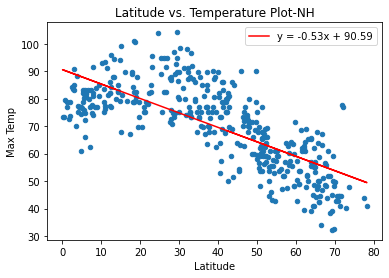

In [64]:


Lat = nh_df.iloc[:,1]
MaxTemp = nh_df.iloc[:,3]
correlation = st.pearsonr(Lat,MaxTemp)
print(f"The r-squared is: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df['Lat'], nh_df['Max Temp'])
regress_values = nh_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


# Add the linear regression equation and line to plot

nh_df.plot(kind='scatter', x='Lat', y='Max Temp');
plt.plot(nh_df['Lat'],regress_values,"r-", label=line_eq)

plt.legend()
plt.xlabel('Latitude')
plt.title('Latitude vs. Temperature Plot-NH')
plt.savefig("Images/Lat vs. Temperature-NH.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.83
The equation of the line fitted through the data is: y = 0.82x + 81.57


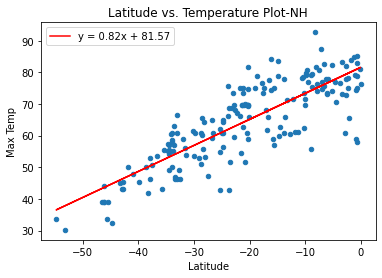

In [65]:


Lat = sh_df.iloc[:,1]
MaxTemp = sh_df.iloc[:,3]
correlation = st.pearsonr(Lat,MaxTemp)
print(f"The r-squared is: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df['Lat'], sh_df['Max Temp'])
regress_values = sh_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


# Add the linear regression equation and line to plot

sh_df.plot(kind='scatter', x='Lat', y='Max Temp');
plt.plot(sh_df['Lat'],regress_values,"r-", label=line_eq)

plt.legend()
plt.xlabel('Latitude')
plt.title('Latitude vs. Temperature Plot-NH')
plt.savefig("Images/Lat vs. Temperature-NH.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03
The equation of the line fitted through the data is: y = 0.03x + 68.06


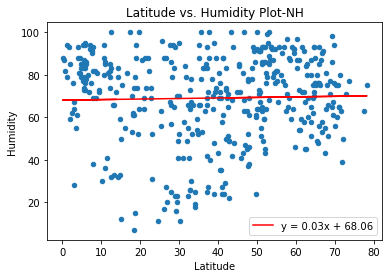

In [66]:


Lat = nh_df.iloc[:,1]
Humidity = nh_df.iloc[:,4]
correlation = st.pearsonr(Lat,Humidity)
print(f"The r-squared is: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df['Lat'], nh_df['Humidity'])
regress_values = nh_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


# Add the linear regression equation and line to plot

nh_df.plot(kind='scatter', x='Lat', y='Humidity');
plt.plot(nh_df['Lat'],regress_values,"r-", label=line_eq)

plt.legend()
plt.xlabel('Latitude')
plt.title('Latitude vs. Humidity Plot-NH')
plt.savefig("Images/Lat vs. Humidity-NH.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.11
The equation of the line fitted through the data is: y = -0.16x + 69.75


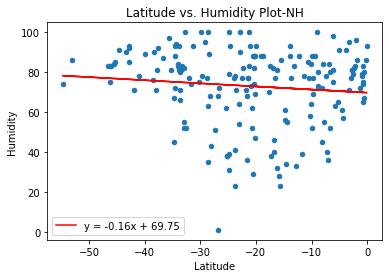

In [67]:


Lat = sh_df.iloc[:,1]
Humidity = sh_df.iloc[:,4]
correlation = st.pearsonr(Lat,Humidity)
print(f"The r-squared is: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df['Lat'], sh_df['Humidity'])
regress_values = sh_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


# Add the linear regression equation and line to plot

sh_df.plot(kind='scatter', x='Lat', y='Humidity');
plt.plot(sh_df['Lat'],regress_values,"r-", label=line_eq)

plt.legend()
plt.xlabel('Latitude')
plt.title('Latitude vs. Humidity Plot-NH')
plt.savefig("Images/Lat vs. Humidity-NH.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.03
The equation of the line fitted through the data is: y = -0.06x + 56.29


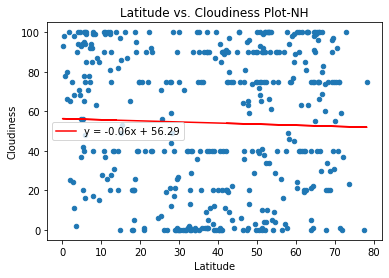

In [68]:


Lat = nh_df.iloc[:,1]
Cloudiness = nh_df.iloc[:,5]
correlation = st.pearsonr(Lat,Cloudiness)
print(f"The r-squared is: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df['Lat'], nh_df['Cloudiness'])
regress_values = nh_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


# Add the linear regression equation and line to plot

nh_df.plot(kind='scatter', x='Lat', y='Cloudiness');
plt.plot(nh_df['Lat'],regress_values,"r-", label=line_eq)

plt.legend()
plt.xlabel('Latitude')
plt.title('Latitude vs. Cloudiness Plot-NH')
plt.savefig("Images/Lat vs. Cloudiness-NH.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.17
The equation of the line fitted through the data is: y = -0.48x + 40.64


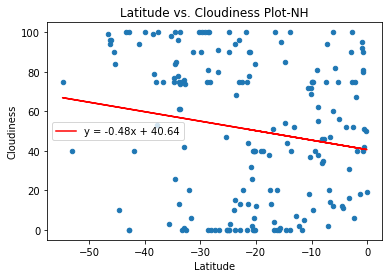

In [70]:

Lat = sh_df.iloc[:,1]
Cloudiness = sh_df.iloc[:,5]
correlation = st.pearsonr(Lat,Cloudiness)
print(f"The r-squared is: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df['Lat'], sh_df['Cloudiness'])
regress_values = sh_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


# Add the linear regression equation and line to plot

sh_df.plot(kind='scatter', x='Lat', y='Cloudiness');
plt.plot(sh_df['Lat'],regress_values,"r-", label=line_eq)

plt.legend()
plt.xlabel('Latitude')
plt.title('Latitude vs. Cloudiness Plot-NH')
plt.savefig("Images/Lat vs. Cloudiness-NH.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03
The equation of the line fitted through the data is: y = 0.01x + 8.29


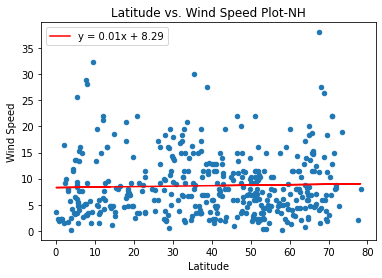

In [71]:


Lat = nh_df.iloc[:,1]
WindSpeed = nh_df.iloc[:,6]
correlation = st.pearsonr(Lat,WindSpeed)
print(f"The r-squared is: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df['Lat'], nh_df['Wind Speed'])
regress_values = nh_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


# Add the linear regression equation and line to plot

nh_df.plot(kind='scatter', x='Lat', y='Wind Speed');
plt.plot(nh_df['Lat'],regress_values,"r-", label=line_eq)

plt.legend()
plt.xlabel('Latitude')
plt.title('Latitude vs. Wind Speed Plot-NH')
plt.savefig("Images/Lat vs. Wind Speed-NH.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.01
The equation of the line fitted through the data is: y = -0.0x + 8.01


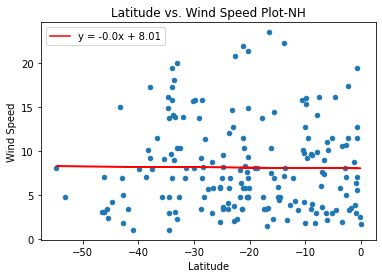

In [72]:


Lat = sh_df.iloc[:,1]
WindSpeed = sh_df.iloc[:,6]
correlation = st.pearsonr(Lat,WindSpeed)
print(f"The r-squared is: {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df['Lat'], sh_df['Wind Speed'])
regress_values = sh_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


# Add the linear regression equation and line to plot

sh_df.plot(kind='scatter', x='Lat', y='Wind Speed');
plt.plot(sh_df['Lat'],regress_values,"r-", label=line_eq)

plt.legend()
plt.xlabel('Latitude')
plt.title('Latitude vs. Wind Speed Plot-NH')
plt.savefig("Images/Lat vs. Wind Speed-NH.png")

plt.show()